In [ ]:
#importing necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import  matplotlib.pyplot as plt
#warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the 2 year IBM Stock Data dataset
df = pd.read_csv("2 Year IBM Stock Data.csv")

In [ ]:
#printing the first few ros of the dataset
df.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


In [ ]:
#printing the last few rows of the dataset
df.tail()

,time,open,high,low,close,volume
216878,4/6/2020 7:27,95.385037,95.385037,95.385037,95.385037,854
216879,4/6/2020 7:25,94.530379,94.530379,94.530379,94.530379,450
216880,4/6/2020 7:08,94.703037,94.703037,94.703037,94.703037,436
216881,4/6/2020 7:02,95.479999,95.479999,95.479999,95.479999,575
216882,4/6/2020 7:01,94.979290,94.979290,94.979290,94.979290,452


In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216883 entries, 0 to 216882
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    216883 non-null  object 
 1   open    216883 non-null  float64
 2   high    216883 non-null  float64
 3   low     216883 non-null  float64
 4   close   216883 non-null  float64
 5   volume  216883 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 9.9+ MB


In [ ]:
#descriptive statistics of the dataset
df.describe()

,open,high,low,close,volume
count,216883.000000,216883.000000,216883.000000,216883.000000,2.168830e+05
mean,118.568888,118.610088,118.527167,118.568678,1.123028e+04
std,11.032437,11.030216,11.034414,11.032587,2.550945e+04
min,93.893379,94.001154,93.878046,93.894886,0.000000e+00
25%,109.270433,109.306157,109.232227,109.272002,3.895500e+03
50%,116.919510,116.953384,116.880199,116.919510,6.786000e+03
75%,129.697796,129.731458,129.666234,129.700000,1.175100e+04
max,140.686324,140.778433,140.363945,140.658692,2.110106e+06


In [ ]:
#checking for the missing values in the dataframe
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
#counting the duplicateed rows
df.duplicated().sum()

0

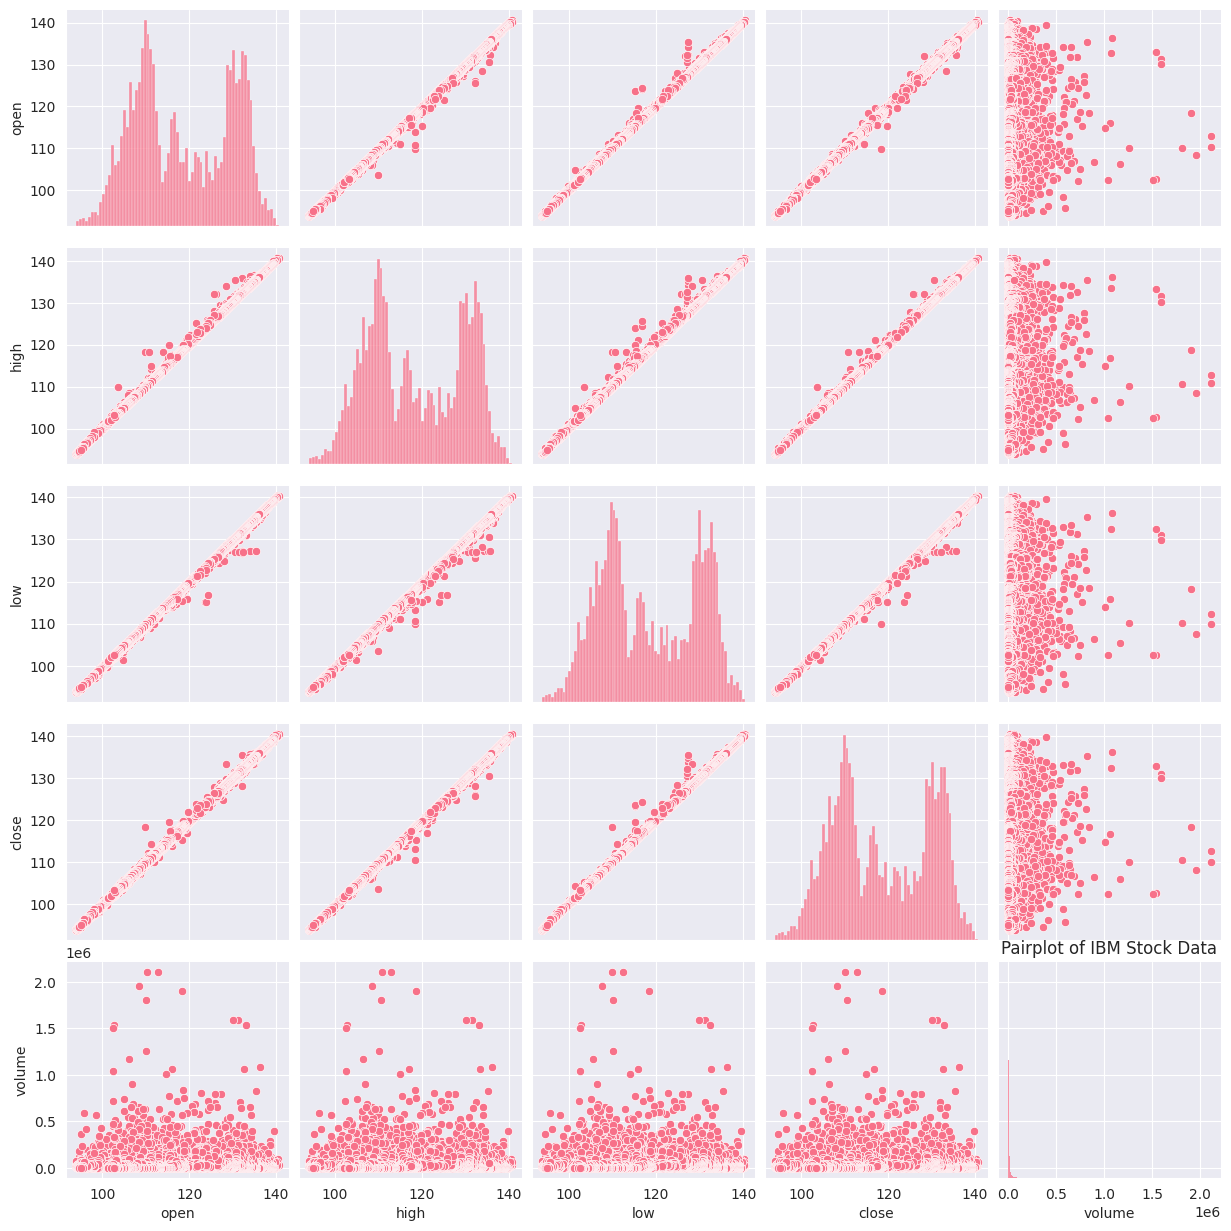

In [ ]:
# Set a custom color palette
sns.set_palette("husl")

# Data Exploration
# Check relationships and column distributions
sns.pairplot(df)
plt.title('Pairplot of IBM Stock Data')
plt.show()


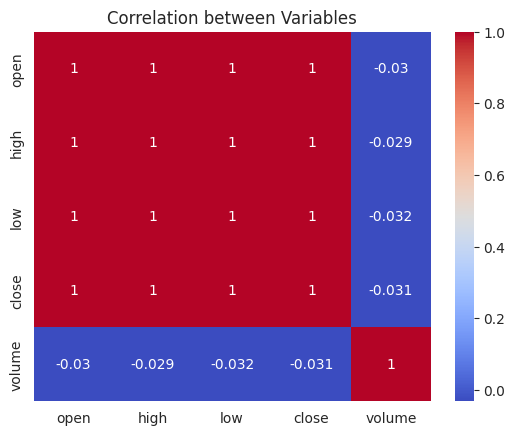

In [ ]:
# Checking Correlation Between Variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation between Variables')
plt.show()

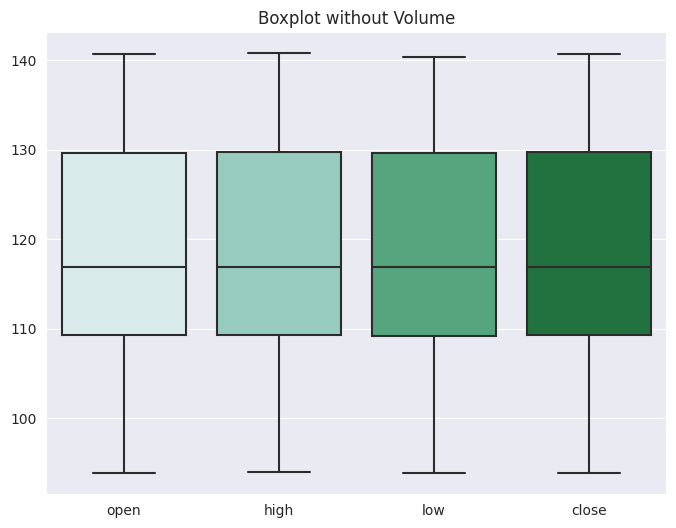

In [ ]:
# Checking For the Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.drop("volume", axis=1), palette='BuGn')
plt.title('Boxplot without Volume')
plt.show()

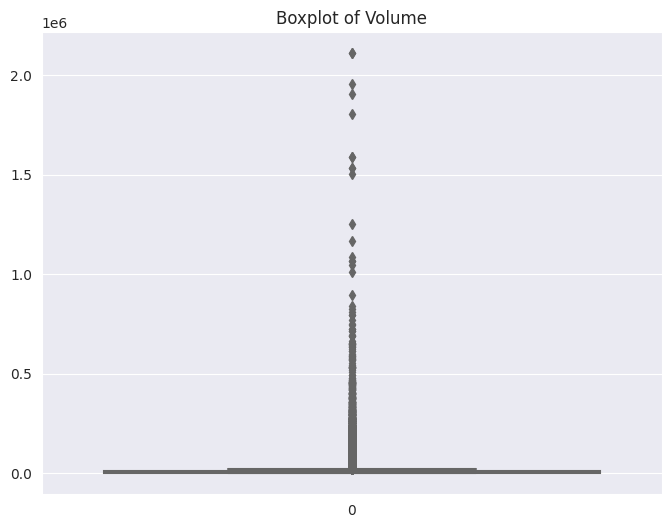

In [ ]:
#box lot of 'volume' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['volume'], palette='OrRd')
plt.title('Boxplot of Volume')
plt.show()

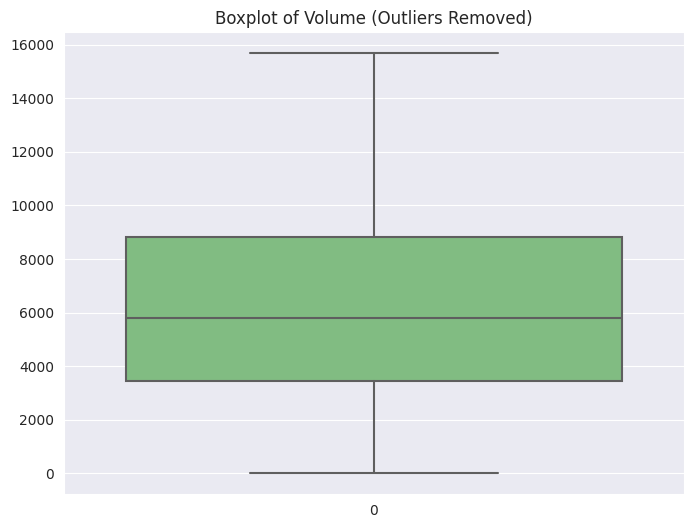

In [ ]:
#box lot of 'volume' column after removing the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['volume'] < (df['volume'].quantile(0.25) + 1.5 * (df['volume'].quantile(0.75) - df['volume'].quantile(0.25)))]['volume'], palette='YlGn')
plt.title('Boxplot of Volume (Outliers Removed)')
plt.show()

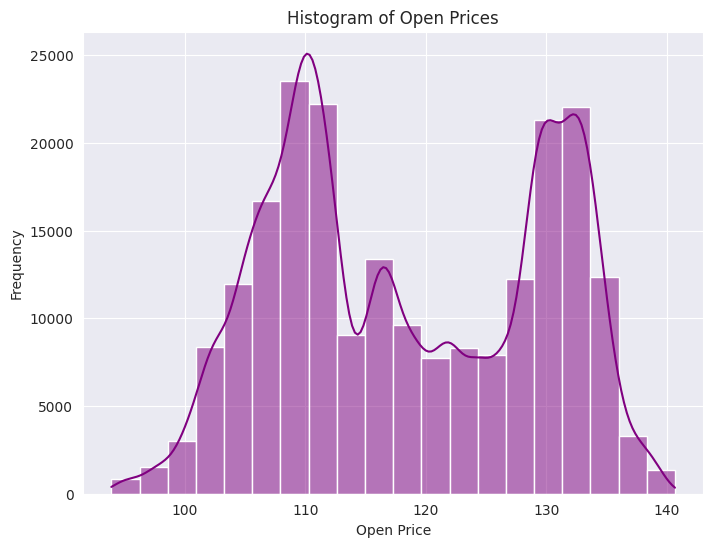

In [ ]:
# Histogram plot for 'open' column
plt.figure(figsize=(8, 6))
sns.histplot(df['open'], bins=20, kde=True, color='purple')
plt.title('Histogram of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
x = df.drop(["high", "time"], axis=1) #x contains all the columns except "high" and "time"
y = np.array(df.high).reshape(-1, 1) #y contains the values of "high"

In [ ]:
# Preparing our Training and Testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape)


(162662, 4) (162662, 1)


In [ ]:
# Creating our model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Testing Our model
y_pred = lr.predict(x_test)


In [ ]:
#printing the R2 Score, RMSE, MAE values for the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R2 Score is: {:.4f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error is: {:.4f}".format(mean_squared_error(y_test, y_pred, squared=False)))
print("Mean Absolute Error is: {:.4f}".format(mean_absolute_error(y_test, y_pred)))

R2 Score is: 1.0000
Root Mean Squared Error is: 0.0690
Mean Absolute Error is: 0.0232
